In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm

In [32]:
input_data = pd.read_csv(r'C:/Users/George/Desktop/Magistratyra/Project/Concantinate/result.csv', index_col='Unnamed: 0')
input_data.index.names=['Timestamp']
# ts = pd.read_csv('./data/TimeSeries_Data10.csv', sep=',', decimal='.')
input_data = input_data.sort_index() # sort in

In [33]:
data = input_data.AQI[:-20]

In [4]:
%%time
best_model = sm.tsa.statespace.SARIMAX(data, order=(4, 1, 1), 
                                        seasonal_order=(3, 1, 1, 12)).fit(disp=-1)
print(best_model.summary())

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                AQI   No. Observations:                 2902
Model:             SARIMAX(4, 1, 1)x(3, 1, 1, 12)   Log Likelihood              -12467.559
Date:                            Wed, 21 Dec 2022   AIC                          24955.119
Time:                                    14:10:10   BIC                          25014.806
Sample:                                01-01-2013   HQIC                         24976.629
                                     - 12-11-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6828      0.015     46.257      0.000       0.654       0.712
ar.L2         -0.0415      0.022   

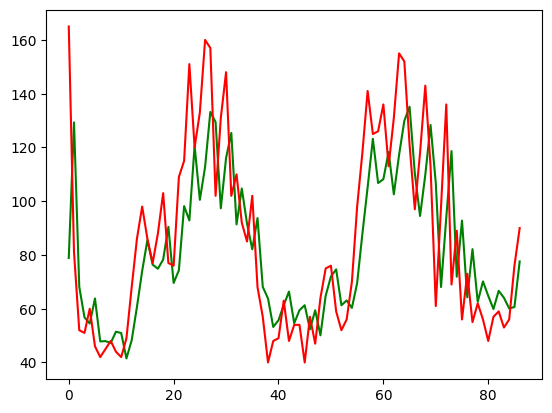

In [34]:
preds_df = (best_model.get_prediction(start='2014-01-01', end='2014-03-28').summary_frame(alpha=0.05))
y = data['2014-01-01':'2014-03-28']

x = np.arange(len(preds_df))

plt.plot(x, preds_df['mean'], color = 'green')
plt.plot(x, y, color = 'red')